In [7]:
import pandas as pd

In [8]:
import numpy as np

In [9]:
import numpy as np

In [10]:
import pandas as pd

In [12]:
df = pd.read_csv("Twitter_Data.csv")

In [ ]:
df.head()

In [14]:
df.describe()

,category
count,57852.000000
mean,0.219180
std,0.780822
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57853 entries, 0 to 57852
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clean_text  57852 non-null  object 
 1   category    57852 non-null  float64
dtypes: float64(1), object(1)
memory usage: 904.1+ KB


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8468585256244059
Confusion Matrix:
 [[1716  390  401]
 [  83 3683  184]
 [ 244  470 4400]]


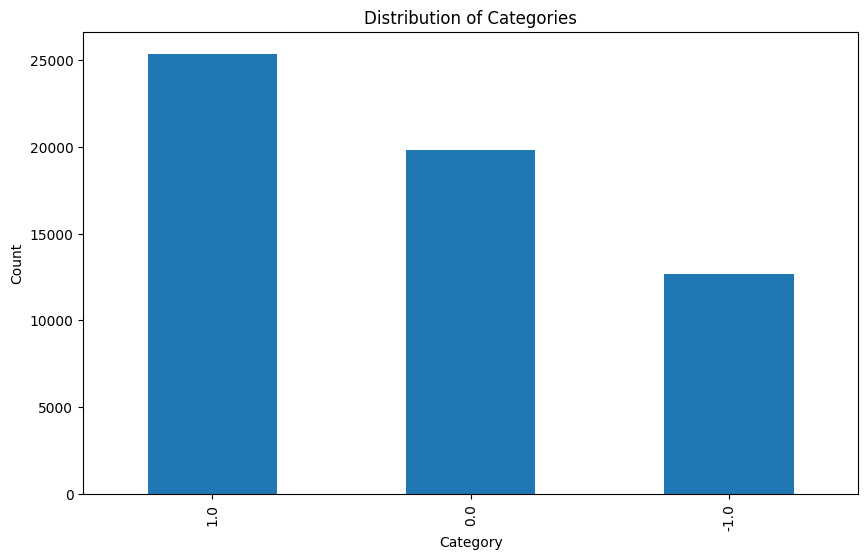

In [21]:
# Load the DataFrame
data = pd.read_csv("Twitter_Data.csv")  # Update "your_data.csv" with the path to your CSV file

# Drop rows with missing values
data.dropna(inplace=True)

# Preprocessing
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        processed_texts = []
        for text in X:
            text = re.sub(r'\W', ' ', str(text))  # Remove special characters
            text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # Remove single characters
            text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)  # Remove single characters from start
            text = re.sub(r'\s+', ' ', text, flags=re.I)  # Substituting multiple spaces with single space
            text = re.sub(r'^b\s+', '', text)  # Removing prefixed 'b'
            text = text.lower()  # Lowercase
            text = [self.lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in self.stop_words]  # Lemmatization
            text = ' '.join(text)
            processed_texts.append(text)
        return processed_texts

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['clean_text'], data['category'], test_size=0.2, random_state=42)

# Pipeline for preprocessing and sentiment analysis
pipeline = Pipeline([
    ('preprocessor', TextPreprocessor()),
    ('tfidf', TfidfVectorizer()),
    ('classifier', LogisticRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Data visualization (example: bar plot of categories distribution)
plt.figure(figsize=(10, 6))
data['category'].value_counts().plot(kind='bar')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()